#About Dataset:
--------------------------
The sales in the mega marts are critical to make them sustainable. As a matter of fact, the rise of several marts have created buyers of different categories which are critical about quality of product at the right price. 

In the Data Analytics Championship 2021, the data science & machine learning community has been challenged to build an ML model and predict the sales of each product from each outlet. The participants also need to use the model to analyse the properties of the product in the stores and find ways to increase sales.

#Data attributes: 
---------------------------
Item_ID: Item Identification Number <br>
Item_W: Item Weight<br>
Item_Type: Item<br>
Item_MRP: MRP of the Product<br>
Outlet_ID: Outlet ID<br>
Outlet_Year: Outlet Establishment year<br>
Outlet_Size: Size of the outlet<br>
Outlet_Type: Type of the outlet<br>
Sales: Total sales from the outlet.<br>

'Train: 87864 rows x 09 columns

'Test: 37656 rows x 09 columns

Objective
--------------
*To Predict the sales of each product from each outlet <br>

*How to increase the sales in Product

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import joblib

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("submission.csv")

In [3]:
train


,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829
...,...,...,...,...,...,...,...,...,...
87859,FDG24,9.994412,Breakfast,147.389893,OUT035,1987,Medium,Tier 3,4975.646052
87860,FDA32,11.259252,Canned,127.965666,OUT049,1987,Medium,Tier 2,2252.492755
87861,FDM04,11.385812,Household,119.028901,OUT018,1997,Medium,Tier 1,2716.058050
87862,NCS18,18.018028,Household,223.416318,OUT018,1988,Medium,Tier 3,991.857233


In [4]:
test

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3
...,...,...,...,...,...,...,...,...
37651,FDY27,6.380000,Dairy,178.334400,OUT018,2009,Medium,Tier 3
37652,FDK38,6.650000,Canned,150.073400,OUT018,2009,Medium,Tier 3
37653,DRF01,5.655000,Soft Drinks,147.510200,OUT046,1997,Small,Tier 1
37654,FDR58,6.675000,Snack Foods,92.946200,OUT018,2009,Medium,Tier 3


In [5]:
submission


,Sales
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
37651,0.0
37652,0.0
37653,0.0
37654,0.0


In [6]:
train["data"]="train"
test["data"]="test"

In [7]:
train


,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,train
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,train
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,train
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,train
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,train
...,...,...,...,...,...,...,...,...,...,...
87859,FDG24,9.994412,Breakfast,147.389893,OUT035,1987,Medium,Tier 3,4975.646052,train
87860,FDA32,11.259252,Canned,127.965666,OUT049,1987,Medium,Tier 2,2252.492755,train
87861,FDM04,11.385812,Household,119.028901,OUT018,1997,Medium,Tier 1,2716.058050,train
87862,NCS18,18.018028,Household,223.416318,OUT018,1988,Medium,Tier 3,991.857233,train


In [8]:
test

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,data
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3,test
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3,test
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1,test
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2,test
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3,test
...,...,...,...,...,...,...,...,...,...
37651,FDY27,6.380000,Dairy,178.334400,OUT018,2009,Medium,Tier 3,test
37652,FDK38,6.650000,Canned,150.073400,OUT018,2009,Medium,Tier 3,test
37653,DRF01,5.655000,Soft Drinks,147.510200,OUT046,1997,Small,Tier 1,test
37654,FDR58,6.675000,Snack Foods,92.946200,OUT018,2009,Medium,Tier 3,test


---------------------Descriptive Analytics---------------------
---------------------------------

In [9]:
data=pd.concat([train,test])

In [10]:
data

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,train
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,train
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,train
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,train
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,train
...,...,...,...,...,...,...,...,...,...,...
37651,FDY27,6.380000,Dairy,178.334400,OUT018,2009,Medium,Tier 3,NaN,test
37652,FDK38,6.650000,Canned,150.073400,OUT018,2009,Medium,Tier 3,NaN,test
37653,DRF01,5.655000,Soft Drinks,147.510200,OUT046,1997,Small,Tier 1,NaN,test
37654,FDR58,6.675000,Snack Foods,92.946200,OUT018,2009,Medium,Tier 3,NaN,test


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125520 entries, 0 to 37655
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Item_ID               125520 non-null  object 
 1   Item_W                125520 non-null  float64
 2   Item_Type             125520 non-null  object 
 3   Item_MRP              125520 non-null  float64
 4   Outlet_ID             125520 non-null  object 
 5   Outlet_Year           125520 non-null  int64  
 6   Outlet_Size           125520 non-null  object 
 7   Outlet_Location_Type  125520 non-null  object 
 8   Sales                 87864 non-null   float64
 9   data                  125520 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 10.5+ MB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_W,125520.0,14.782266,4.427802,4.598804,10.465685,14.553760,19.376857,21.250000
Item_MRP,125520.0,149.634197,60.185944,32.910015,110.163563,143.892967,196.590199,265.214271
Outlet_Year,125520.0,1999.919328,6.710208,1987.000000,1997.000000,1999.000000,2004.000000,2009.000000
Sales,87864.0,1911.842120,1291.386004,-1229.360345,959.249675,1606.307877,2608.057736,10309.283310


In [13]:
data.isna().sum()

Item_ID                     0
Item_W                      0
Item_Type                   0
Item_MRP                    0
Outlet_ID                   0
Outlet_Year                 0
Outlet_Size                 0
Outlet_Location_Type        0
Sales                   37656
data                        0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
data.apply(lambda x: x.nunique())

Item_ID                    896
Item_W                  123907
Item_Type                   16
Item_MRP                125326
Outlet_ID                    5
Outlet_Year                 12
Outlet_Size                  3
Outlet_Location_Type         3
Sales                    87760
data                         2
dtype: int64

In [16]:
data.apply(lambda x : print(x.value_counts()))

FDE11    603
NCE07    527
NCL18    498
FDD51    459
NCO06    450
        ... 
FDW34      3
FDA22      2
DRF60      2
FDI12      2
FDD39      2
Name: Item_ID, Length: 896, dtype: int64
13.650000    22
20.700000    22
12.500000    21
18.250000    21
12.150000    21
             ..
10.870550     1
20.248475     1
19.803545     1
10.264924     1
9.920082      1
Name: Item_W, Length: 123907, dtype: int64
Fruits and Vegetables    18775
Baking Goods             16435
Snack Foods              14679
Household                10827
Frozen Foods              9490
Meat                      9412
Canned                    7978
Soft Drinks               7574
Dairy                     7296
Health and Hygiene        5268
Others                    4233
Breads                    3966
Hard Drinks               3721
Starchy Foods             3401
Seafood                   1274
Breakfast                 1191
Name: Item_Type, dtype: int64
146.910200    4
196.508400    3
261.291000    3
170.910600    3
126.204

Item_ID                 None
Item_W                  None
Item_Type               None
Item_MRP                None
Outlet_ID               None
Outlet_Year             None
Outlet_Size             None
Outlet_Location_Type    None
Sales                   None
data                    None
dtype: object

In [17]:
data["Item_ID_group"] = data["Item_ID"].apply(lambda x : x[0:3])



In [18]:
data[["Item_ID_group"]].apply(lambda x : print(x.value_counts()))

FDX    4874
FDY    4471
FDS    4442
FDZ    4401
FDD    4289
       ... 
DRO     207
DRZ     153
DRQ     118
DRP      75
NCD      23
Name: Item_ID_group, Length: 70, dtype: int64


Item_ID_group    None
dtype: object

------------------------------Observations-------------------------------
----------------------------------------------------------------------------------------
1. No Null value <br>
2. No Duplicate value <br>
3. Check the sales of each item based on Item_Weight <br>
4. Check the sales of each item based on Item_Type <br>
5. Check the sales of each item based on Item_MRP <br>
6. Three types of Outlet id available.Check the sales of each Outlet based on Outlet id <br>
7. Three types of Outlet_Size available.Check the sales of each Outlet based on Outlet_Size <br>
8. Three types of location available. Check the sales of each Tier <br>

--------------------------------Exploratory Data Analysis(EDA)-------------------------------------
-------------------------------------------------

In [19]:
train.groupby(["Item_ID"]).Sales.mean().sort_values(ascending=False)

Item_ID
NCM19    3488.126200
FDZ16    3161.892837
NCG18    3150.204810
NCG55    3144.761605
FDB20    3094.223540
            ...     
FDA08    1260.621325
FDS23    1241.909179
FDT56    1208.822194
DRH39    1082.202985
FDI12     688.942436
Name: Sales, Length: 895, dtype: float64

In [20]:
train

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,train
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,train
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,train
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,train
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,train
...,...,...,...,...,...,...,...,...,...,...
87859,FDG24,9.994412,Breakfast,147.389893,OUT035,1987,Medium,Tier 3,4975.646052,train
87860,FDA32,11.259252,Canned,127.965666,OUT049,1987,Medium,Tier 2,2252.492755,train
87861,FDM04,11.385812,Household,119.028901,OUT018,1997,Medium,Tier 1,2716.058050,train
87862,NCS18,18.018028,Household,223.416318,OUT018,1988,Medium,Tier 3,991.857233,train


In [21]:
train.groupby(["Item_W"]).Sales.mean().sort_values(ascending=False)

Item_W
14.288374    10309.283310
10.609977     9490.959165
20.348532     9457.092997
21.166525     9351.239250
9.037128      9226.330112
                 ...     
10.397949     -601.320050
11.328796     -669.891835
10.187308     -762.750511
20.166809     -859.248126
10.962277    -1229.360345
Name: Sales, Length: 87283, dtype: float64

<AxesSubplot:xlabel='Item_W'>

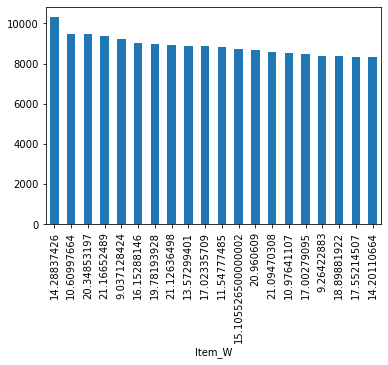

In [22]:
train.groupby(["Item_W"]).Sales.mean().sort_values(ascending=False).head(20).plot(kind='bar')

In [23]:
train.groupby(["Item_Type"]).Sales.mean().sort_values(ascending=False)

Item_Type
Breakfast                2027.160568
Breads                   2024.497959
Soft Drinks              2022.100236
Seafood                  2004.039467
Hard Drinks              1975.622648
Baking Goods             1965.720204
Frozen Foods             1942.476254
Meat                     1931.644796
Canned                   1920.984124
Snack Foods              1901.109733
Starchy Foods            1896.604218
Household                1893.392432
Others                   1890.748640
Health and Hygiene       1859.953798
Fruits and Vegetables    1799.722824
Dairy                    1797.610717
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Item_Type'>

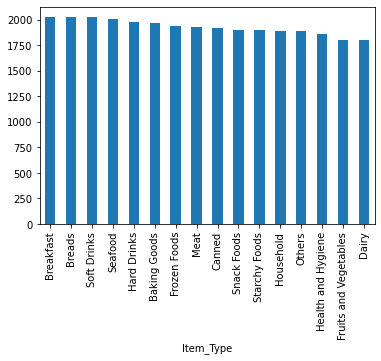

In [24]:
train.groupby(["Item_Type"]).Sales.mean().sort_values(ascending=False).plot(kind = "bar")

In [25]:
train.groupby(["Item_MRP"]).Sales.mean().sort_values(ascending=False)

Item_MRP
249.247322    10309.283310
212.217902     9490.959165
110.204488     9457.092997
111.597022     9351.239250
179.795840     9226.330112
                  ...     
239.061185     -601.320050
135.209264     -669.891835
46.658574      -762.750511
253.539616     -859.248126
152.361247    -1229.360345
Name: Sales, Length: 87814, dtype: float64

In [26]:
train.groupby(["Item_Type","Item_MRP"]).Sales.mean().sort_values(ascending=False)

Item_Type              Item_MRP  
Soft Drinks            249.247322    10309.283310
Baking Goods           212.217902     9490.959165
Dairy                  110.204488     9457.092997
Fruits and Vegetables  111.597022     9351.239250
Baking Goods           179.795840     9226.330112
                                         ...     
Dairy                  239.061185     -601.320050
Baking Goods           135.209264     -669.891835
Fruits and Vegetables  46.658574      -762.750511
Baking Goods           253.539616     -859.248126
Household              152.361247    -1229.360345
Name: Sales, Length: 87847, dtype: float64

In [27]:
train.groupby(["Item_Type","Item_MRP","Item_W"]).Sales.mean().sort_values(ascending=False)

Item_Type              Item_MRP    Item_W   
Soft Drinks            249.247322  14.288374    10309.283310
Baking Goods           212.217902  10.609977     9490.959165
Dairy                  110.204488  20.348532     9457.092997
Fruits and Vegetables  111.597022  21.166525     9351.239250
Baking Goods           179.795840  9.037128      9226.330112
                                                    ...     
Dairy                  239.061185  10.397949     -601.320050
Baking Goods           135.209264  11.328796     -669.891835
Fruits and Vegetables  46.658574   10.187308     -762.750511
Baking Goods           253.539616  20.166809     -859.248126
Household              152.361247  10.962277    -1229.360345
Name: Sales, Length: 87851, dtype: float64

In [28]:
train.groupby(["Outlet_ID"]).Sales.mean().sort_values(ascending=False)

Outlet_ID
OUT013    2059.436839
OUT035    2001.148871
OUT049    1958.054154
OUT046    1899.631296
OUT018    1658.457588
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_ID'>

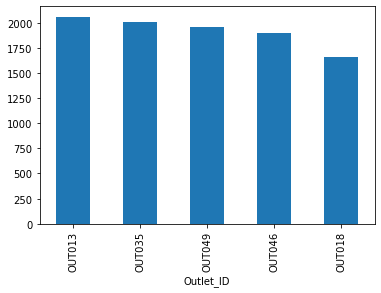

In [29]:
train.groupby(["Outlet_ID"]).Sales.mean().sort_values(ascending=False).plot(kind='bar')

In [30]:
train.groupby(["Outlet_ID"]).Sales.sum().sort_values(ascending=False)

Outlet_ID
OUT035    4.816965e+07
OUT046    3.960731e+07
OUT018    2.845250e+07
OUT049    2.615177e+07
OUT013    2.560086e+07
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_ID'>

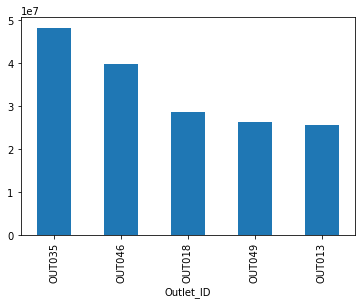

In [31]:
train.groupby(["Outlet_ID"]).Sales.sum().sort_values(ascending=False).plot(kind='bar')

In [32]:
train.groupby(["Outlet_Size"]).Sales.mean().sort_values(ascending=False)

Outlet_Size
High      2042.529716
Small     1956.457737
Medium    1769.006057
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Size'>

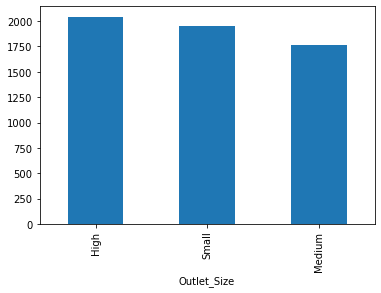

In [33]:
train.groupby(["Outlet_Size"]).Sales.mean().sort_values(ascending=False).plot(kind='bar')

In [34]:
train.groupby(["Outlet_Location_Type"]).Sales.mean().sort_values(ascending=False)

Outlet_Location_Type
Tier 2    2005.717834
Tier 1    1941.552580
Tier 3    1795.882388
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Location_Type'>

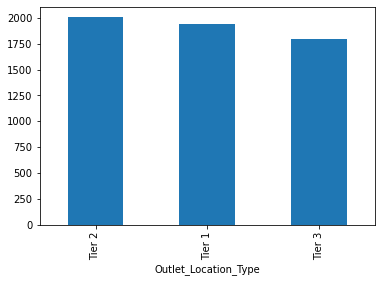

In [35]:
train.groupby(["Outlet_Location_Type"]).Sales.mean().sort_values(ascending=False).plot(kind='bar')

In [36]:
train.groupby(["Outlet_Size","Item_Type",]).Sales.mean().sort_values(ascending=False)

Outlet_Size  Item_Type            
High         Breads                   2155.071529
             Breakfast                2137.642148
             Canned                   2129.680203
             Soft Drinks              2108.053303
             Seafood                  2094.382701
             Baking Goods             2085.318349
             Meat                     2082.213450
Small        Breads                   2063.052298
High         Hard Drinks              2050.888100
             Snack Foods              2042.861089
Small        Soft Drinks              2041.434166
             Breakfast                2039.148192
             Seafood                  2029.688082
High         Frozen Foods             2026.008135
             Others                   2015.886498
             Fruits and Vegetables    1999.515557
Medium       Hard Drinks              1985.737114
Small        Baking Goods             1984.362625
             Canned                   1980.309236
Medium       So

<AxesSubplot:ylabel='Frequency'>

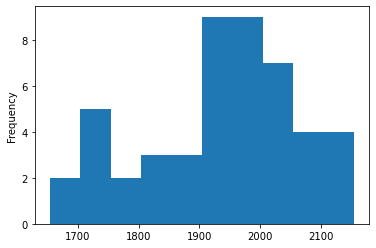

In [37]:
train.groupby(["Outlet_Size","Item_Type",]).Sales.mean().sort_values(ascending=False).plot(kind='hist')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Sales'>

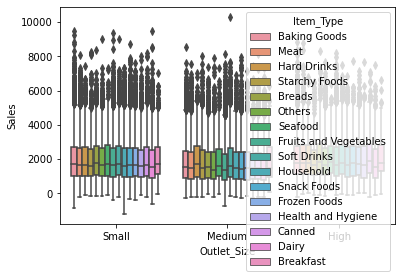

In [38]:
sns.boxplot(data = train, x = "Outlet_Size", y = "Sales", hue = "Item_Type")

In [39]:
train.groupby(["Outlet_Location_Type","Item_Type",]).Sales.mean().sort_values(ascending=False)

Outlet_Location_Type  Item_Type            
Tier 2                Breakfast                2182.001395
Tier 1                Seafood                  2090.553199
Tier 2                Hard Drinks              2080.074551
                      Seafood                  2077.606260
Tier 1                Soft Drinks              2068.353324
                      Breads                   2063.073890
Tier 2                Breads                   2053.458377
                      Soft Drinks              2052.790969
Tier 1                Breakfast                2050.577510
Tier 2                Meat                     2042.132975
                      Baking Goods             2036.945364
                      Frozen Foods             2024.131745
                      Starchy Foods            2018.770301
Tier 1                Canned                   2006.550719
Tier 2                Canned                   1995.509643
Tier 3                Hard Drinks              1994.705412
Tier 2      

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Sales'>

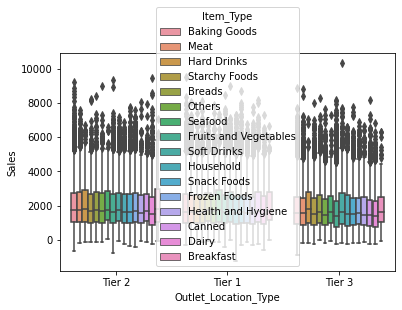

In [40]:
sns.boxplot(data = train, x = "Outlet_Location_Type", y = "Sales", hue = "Item_Type")

In [41]:
data[["Item_ID_group"]].apply(lambda x : print(x.value_counts()))

FDX    4874
FDY    4471
FDS    4442
FDZ    4401
FDD    4289
       ... 
DRO     207
DRZ     153
DRQ     118
DRP      75
NCD      23
Name: Item_ID_group, Length: 70, dtype: int64


Item_ID_group    None
dtype: object

<AxesSubplot:xlabel='Outlet_Size', ylabel='Sales'>

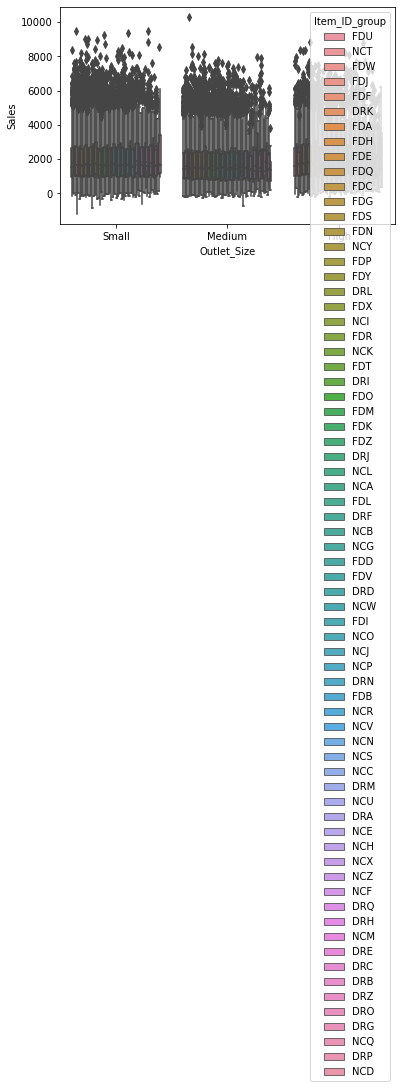

In [42]:
sns.boxplot(data = data, x = "Outlet_Size", y = "Sales", hue = "Item_ID_group")

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Sales'>

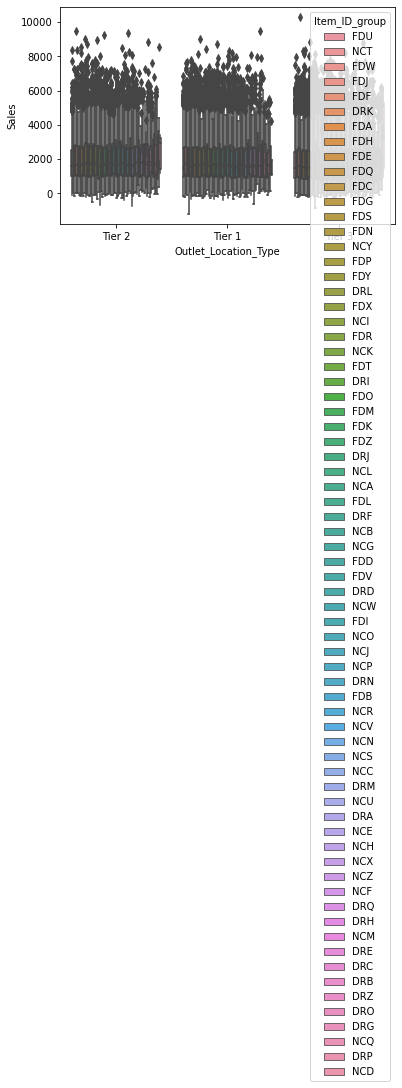

In [43]:
sns.boxplot(data = data, x = "Outlet_Location_Type", y = "Sales", hue = "Item_ID_group")

<AxesSubplot:>

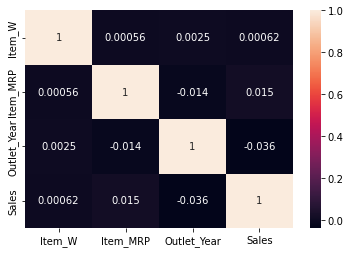

In [44]:
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot=True)


------------------------------Feature Engineering-------------------------------
----------------------------------------------------------------------------------------
_______________________________________________________________________

In [45]:
data["Outlet_Age"]=2021-data["Outlet_Year"]

In [46]:
data

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data,Item_ID_group,Outlet_Age
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,train,FDU,17
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,train,NCT,34
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,train,FDW,22
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,train,FDJ,25
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,train,FDF,33
...,...,...,...,...,...,...,...,...,...,...,...,...
37651,FDY27,6.380000,Dairy,178.334400,OUT018,2009,Medium,Tier 3,NaN,test,FDY,12
37652,FDK38,6.650000,Canned,150.073400,OUT018,2009,Medium,Tier 3,NaN,test,FDK,12
37653,DRF01,5.655000,Soft Drinks,147.510200,OUT046,1997,Small,Tier 1,NaN,test,DRF,24
37654,FDR58,6.675000,Snack Foods,92.946200,OUT018,2009,Medium,Tier 3,NaN,test,FDR,12


In [47]:
del data["Outlet_Year"]

In [48]:
data = data.reset_index().drop(columns="index")

In [49]:
data.to_csv("data.csv", index = False)

In [50]:
data

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Size,Outlet_Location_Type,Sales,data,Item_ID_group,Outlet_Age
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,Small,Tier 2,2689.457781,train,FDU,17
1,NCT54,21.102371,Meat,148.250214,OUT035,Small,Tier 1,3437.350375,train,NCT,34
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,Small,Tier 3,3129.967268,train,FDW,22
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,Small,Tier 1,1306.514376,train,FDJ,25
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,Small,Tier 3,1739.769829,train,FDF,33
...,...,...,...,...,...,...,...,...,...,...,...
125515,FDY27,6.380000,Dairy,178.334400,OUT018,Medium,Tier 3,NaN,test,FDY,12
125516,FDK38,6.650000,Canned,150.073400,OUT018,Medium,Tier 3,NaN,test,FDK,12
125517,DRF01,5.655000,Soft Drinks,147.510200,OUT046,Small,Tier 1,NaN,test,DRF,24
125518,FDR58,6.675000,Snack Foods,92.946200,OUT018,Medium,Tier 3,NaN,test,FDR,12
